## Data Wrangling II

In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np


In [2]:
df = pd.read_csv('Datasets/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
q1 = df['reading score'].quantile(0.25)
q3 = df['reading score'].quantile(0.75)
print(q1, q3)

59.0 79.0


In [4]:
iqr = q3 - q1
print(iqr)

20.0


In [5]:
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound, upper_bound)

29.0 109.0


In [6]:
outliers = df[(df['reading score'] < lower_bound) | (df['reading score'] > upper_bound)]
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [7]:
df_without_outliers = df[(df['reading score'] > lower_bound) & (df['reading score'] < upper_bound)]
df_without_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
ZScore = (df['reading score'] - df['reading score'].mean()) / df['reading score'].std()
ZScore

0      0.193902
1      1.426762
2      1.769223
3     -0.833482
4      0.604855
         ...   
995    2.043192
996   -0.970467
997    0.125409
998    0.604855
999    1.152793
Name: reading score, Length: 1000, dtype: float64

In [9]:
just_outliers = df[(ZScore < -3) | (ZScore > 3)]
just_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [10]:
df_without_just_outliers = df[(ZScore > -3) & (ZScore < 3)]
df_without_just_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


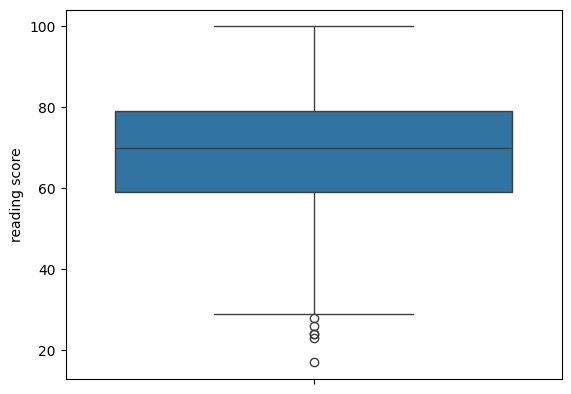

In [11]:
boxplot = sns.boxplot(data=df['reading score'])

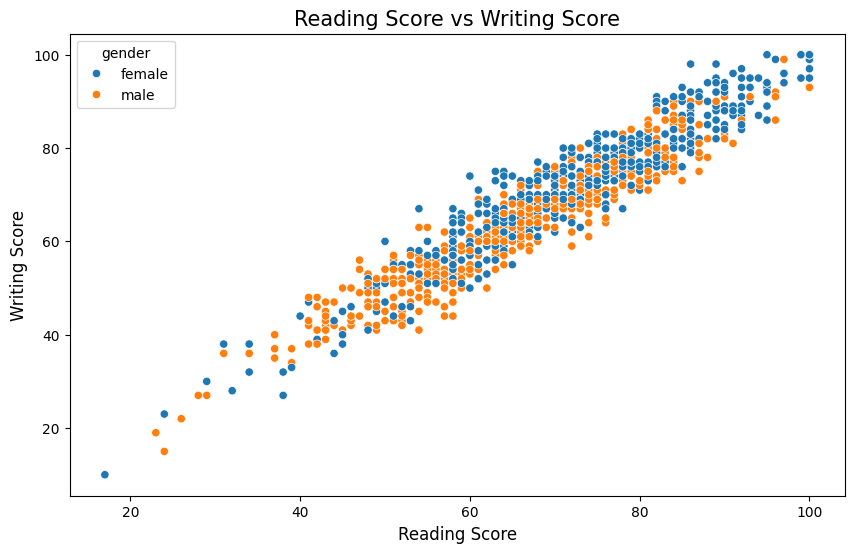

In [12]:
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x='reading score', y='writing score',hue='gender', data=df)
plt.title('Reading Score vs Writing Score', fontsize=15)
plt.xlabel('Reading Score', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.show()

## Identifying and removing the skewness using different techniques

In [14]:
# Identifying the skewness of the numerical columns
df[['math score', 'reading score', 'writing score']].skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

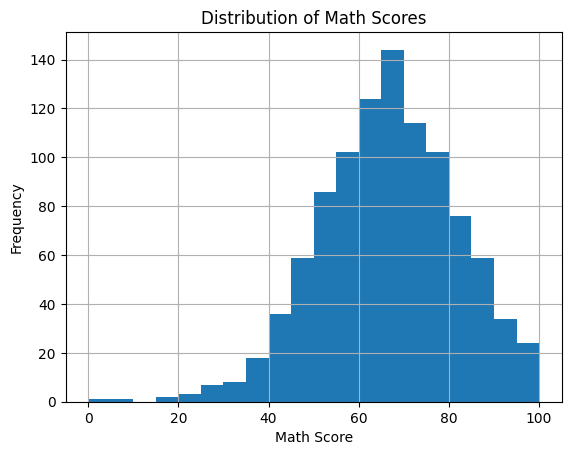

In [15]:
# Histograms, kdeplots and Q-Q plots
df['math score'].hist(bins=20)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'KDE Plot of Math Scores')

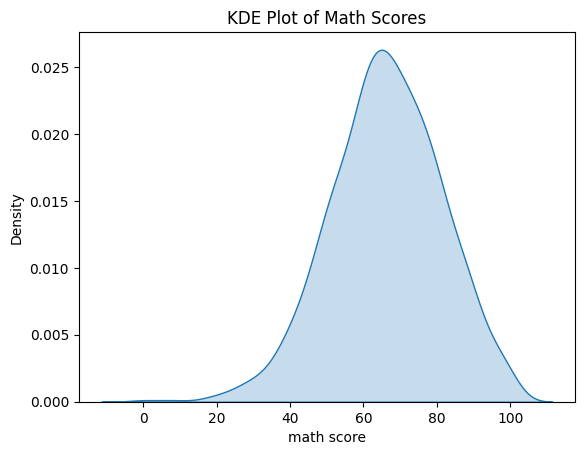

In [20]:
#kdeplot
sns.kdeplot(df['math score'], fill=True)
plt.title('KDE Plot of Math Scores')

Text(0.5, 1.0, 'Q-Q Plot of Math Scores')

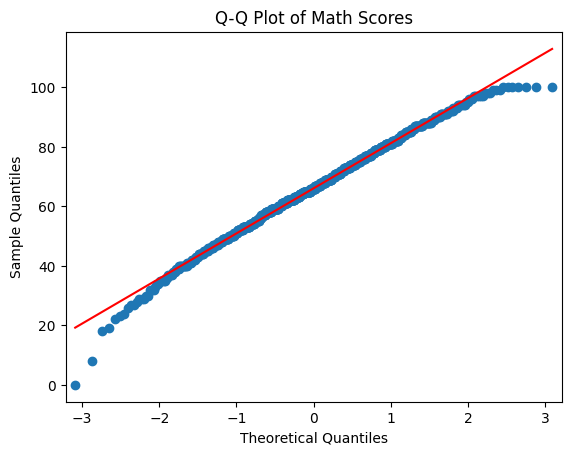

In [25]:
#Q-Q plot
sm.qqplot(df['math score'], line='s')
plt.title('Q-Q Plot of Math Scores')

<Axes: >

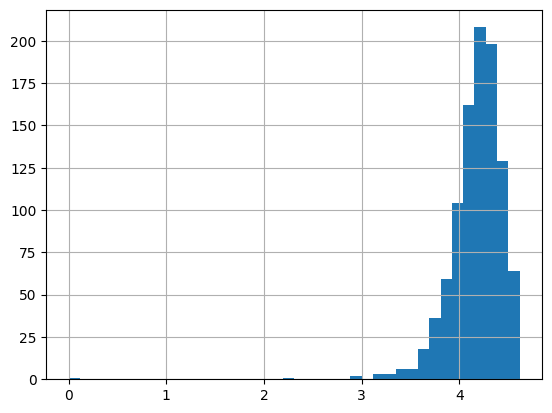

In [31]:
#Log transformation
math_log = df['math score'].apply(lambda x: x+1).transform(np.log)
math_log.hist(bins=40)

In [48]:
# sqrt transformation
math_sqrt = np.cbrt(df['math score'])
math_sqrt.skew()

np.float64(-2.194645034296457)

In [49]:
df['reading score'].skew()

np.float64(-0.25910451810923063)

<Axes: >

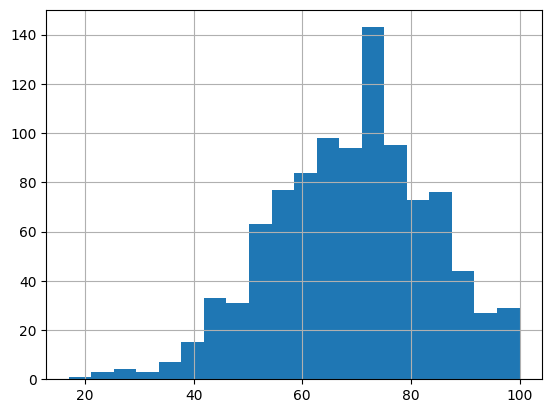

In [50]:
df['reading score'].hist(bins=20)

<Axes: >

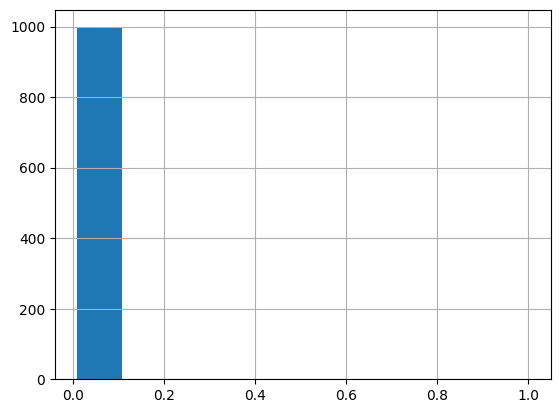

In [54]:
#reciprocal transformation
math_reciprocal = df['math score'].apply(lambda x: 1/(x+1))
math_reciprocal.skew()
math_reciprocal.hist()